In [1]:
from __future__ import division
import os,sys
from numpy import *
from pandas import *
from random import shuffle
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

In [2]:
#输入文件内的数据输入到变量里
def loadDataSet(fileName):
    numFeat=len(open(fileName).readline().split('\t'))-2
#     shuffle(numFeat)
    dataArr=[]
    lonArr=[]
    latArr=[]
    fr=open(fileName)
    for line in fr.readlines():
        lineArr=[]
        lineArr.append(1.0)
        curLine=line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataArr.append(lineArr)
        lonArr.append(float(curLine[-2]))
        latArr.append(float(curLine[-1]))
    return dataArr,lonArr,latArr

#文件内的数据随机打乱，然后输入到变量中
def loadShuffleData(fileName):
    numFeat=len(open(fileName).readline().split('\t'))-2
    dataArr=[]
    lonArr=[]
    latArr=[]
    fr=open(fileName)
    for line in fr.readlines():
        lineArr=[]
        lineArr.append(1.0)
        curLine=line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataArr.append(lineArr)
        lonArr.append(float(curLine[-2]))
        latArr.append(float(curLine[-1]))
    shuffle(dataArr)
    shuffle(lonArr)
    shuffle(latArr)
    return dataArr,lonArr,latArr

In [3]:
#标准回归训练
def standRegres(xArr,yArr):
    xMat=mat(xArr)
    yMat=mat(yArr).T
    xTx=xMat.T*xMat
    if linalg.det(xTx)==0.0:
        print "This matrix is singular, cannot do inverse"
        return 
    ws=xTx.I*(xMat.T*yMat)
    return ws

#计算误差平方和
def rssError(yArr,yHatArr):
    return ((yArr-yHatArr)**2).sum()

#计算误差
def absError(yArr,yHatArr):
    return abs(yArr-yHatArr).sum()/len(yArr)

#画出经纬度真实值与经纬度预测值的相关分布
def plot_coe(lonTestY,lonHatY,latTestY,latHatY):
    fig1=plt.figure('fig1')
    ax1=fig1.add_subplot(111)
    ax1.scatter(lonTestY,lonHatY)
    plt.xlabel('lonTestY')
    plt.ylabel('lonHatY')
    fig2=plt.figure('fig2')
    ax2=fig2.add_subplot(111)
    ax2.scatter(latTestY,latHatY)
    plt.xlabel('latTestY')
    plt.ylabel('latHatY')

def DataSort(filename,p=0.8):
#     p为测试集的比例,filename为保存数据的文件名字
    dataArr,lonArr,latArr=loadDataSet(filename)
#     p=0.8
    trainX=dataArr[0:int(len(dataArr)*p)-1]
    lonTrainY=lonArr[0:int(len(lonArr)*p)-1]
    latTrainY=latArr[0:int(len(latArr)*p)-1]
    testX=dataArr[int(len(dataArr)*p):]
    lonTestY=lonArr[int(len(lonArr)*p):]
    latTestY=latArr[int(len(latArr)*p):]
#     print int(len(dataArr)*p),int(len(lonArr)*p),int(len(latArr)*p)
    return trainX,lonTrainY,latTrainY,testX,lonTestY,latTestY

3265.08550253
579.258691705
364767.761797


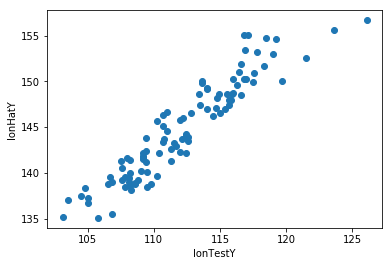

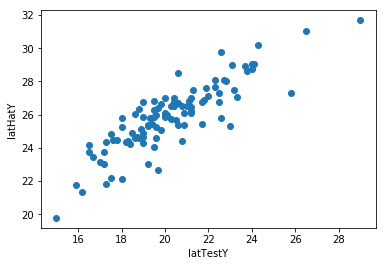

In [4]:
dataArr,lonArr,latArr=loadDataSet('data/typhoon.dat')
# dataArr,lonArr,latArr=loadShuffleData('data/typhoon.dat')

#随机打乱数据
# shuffle(dataArr)
# shuffle(lonArr)
# shuffle(latArr)
p=0.8
trainX=dataArr[0:int(len(dataArr)*p)-1]
lonTrainY=lonArr[0:int(len(lonArr)*p)-1]
latTrainY=latArr[0:int(len(latArr)*p)-1]
testX=dataArr[int(len(dataArr)*p):]
lonTestY=lonArr[int(len(lonArr)*p):]
latTestY=latArr[int(len(latArr)*p):]
#     print int(len(dataArr)*p),int(len(lonArr)*p),int(len(latArr)*p)
#训练回归参数
wsLon=standRegres(trainX,lonTrainY)
wsLat=standRegres(trainX,latTrainY)
#预测经纬度
lonHatY=testX*wsLon
latHatY=testX*wsLat

#经度误差
absErrorlon=absError(lonTestY,lonHatY)
print absErrorlon
#纬度误差
absErrorlat=absError(latTestY,latHatY)
print absErrorlat

print 110*sqrt(absErrorlon**2+absErrorlat**2)

#画出经纬度真实值与经纬度预测值的相关分布
plot_coe(lonTestY,lonHatY,latTestY,latHatY)

1.15470562835
0.862023508569
158.508038823


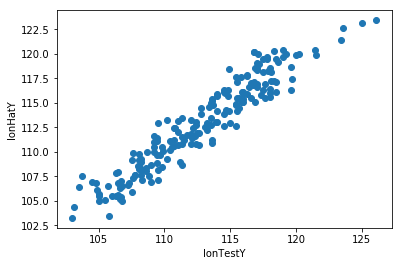

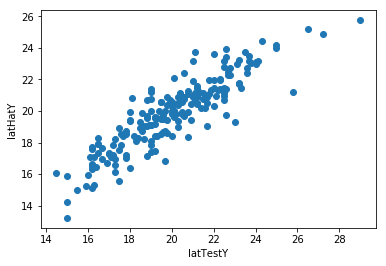

In [5]:
#调用Sklearn的线性回归算法
from sklearn import linear_model

dataArr,lonArr,latArr=loadDataSet('data/typhoon.dat')

#随机打乱数据
# shuffle(dataArr)
# shuffle(lonArr)
# shuffle(latArr)
trainX=dataArr[0:299]
lonTrainY=lonArr[0:299]
latTrainY=latArr[0:299]
testX=dataArr[300:]
lonTestY=lonArr[300:]
latTestY=latArr[300:]

#读取p比例的数值为训练集，剩下的为测试集数据
# trainX,lonTrainY,latTrainY,testX,lonTestY,latTestY=DataSort('data/typhoon.dat',0.6)


clf=linear_model.LinearRegression()

clf.fit(trainX,lonTrainY)
lonHatY=clf.predict(testX)

clf.fit(trainX,latTrainY)
latHatY=clf.predict(testX)

absErrorlon=absError(lonTestY,lonHatY)
absErrorlat=absError(latTestY,latHatY)

#经度误差
#纬度误差
print absErrorlon
print absErrorlat
#计算距离公式
print 110*sqrt(absErrorlon**2+absErrorlat**2)

#画出经纬度真实值与经纬度预测值的相关分布
plot_coe(lonTestY,lonHatY,latTestY,latHatY)

1.14446149628
0.873174215789
158.347486446


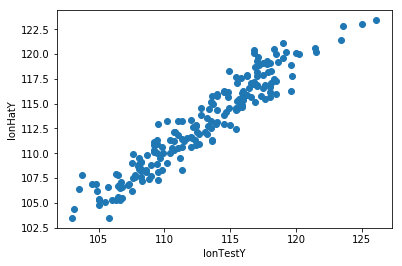

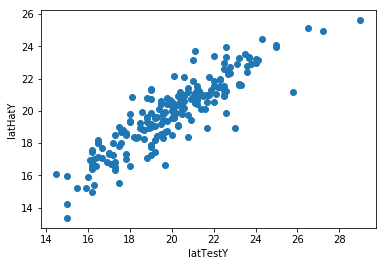

In [6]:
#调用Sklearn的岭回归算法
from sklearn import linear_model

dataArr,lonArr,latArr=loadDataSet('data/typhoon.dat')

#随机打乱数据
# shuffle(dataArr)
# shuffle(lonArr)
# shuffle(latArr)
trainX=dataArr[0:299]
lonTrainY=lonArr[0:299]
latTrainY=latArr[0:299]
testX=dataArr[300:]
lonTestY=lonArr[300:]
latTestY=latArr[300:]
#读取p比例的数值为训练集，剩下的为测试集数据
# trainX,lonTrainY,latTrainY,testX,lonTestY,latTestY=DataSort('data/typhoon.dat',0.6)

clf=linear_model.Ridge(alpha=0.5)
clf.fit(trainX,lonTrainY)
lonHatY=clf.predict(testX)

clf.fit(trainX,latTrainY)
latHatY=clf.predict(testX)

absErrorlon=absError(lonTestY,lonHatY)
absErrorlat=absError(latTestY,latHatY)

#经度误差
#纬度误差
print absErrorlon
print absErrorlat
print 110*sqrt(absErrorlon**2+absErrorlat**2)
#画出真实值与预测值的相关分布
plot_coe(lonTestY,lonHatY,latTestY,latHatY)

1.17686223428
0.912718857663
163.824696619


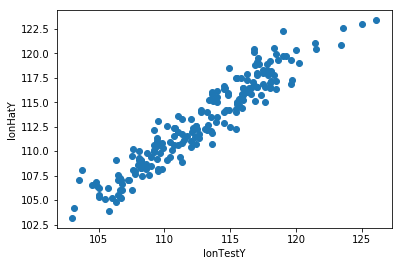

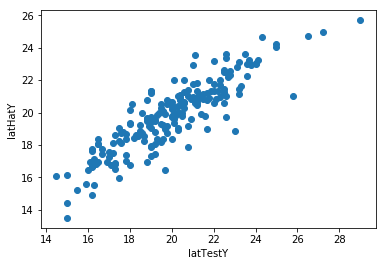

In [7]:
#调用Sklearn的Lasso线性回归算法
from sklearn import linear_model

dataArr,lonArr,latArr=loadDataSet('data/typhoon.dat')

#随机打乱数据
# shuffle(dataArr)
# shuffle(lonArr)
# shuffle(latArr)
trainX=dataArr[0:299]
lonTrainY=lonArr[0:299]
latTrainY=latArr[0:299]
testX=dataArr[300:]
lonTestY=lonArr[300:]
latTestY=latArr[300:]

#读取p比例的数值为训练集，剩下的为测试集数据
# trainX,lonTrainY,latTrainY,testX,lonTestY,latTestY=DataSort('data/typhoon.dat',0.6)

clf=linear_model.Lasso(alpha=0.1)

clf.fit(trainX,lonTrainY)
lonHatY=clf.predict(testX)

clf.fit(trainX,latTrainY)
latHatY=clf.predict(testX)

absErrorlon=absError(lonTestY,lonHatY)
absErrorlat=absError(latTestY,latHatY)

#经度误差
#纬度误差
print absErrorlon
print absErrorlat
print 110*sqrt(absErrorlon**2+absErrorlat**2)
#画出真实值与预测值的相关分布
plot_coe(lonTestY,lonHatY,latTestY,latHatY)

1.18496937315
0.929868777885
165.688204615


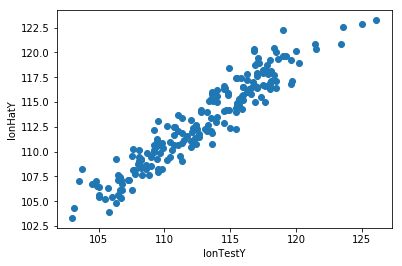

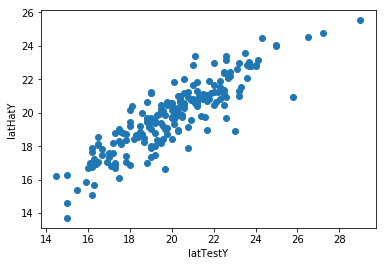

In [8]:
#调用Sklearn的ElasticNet线性回归算法
from sklearn import linear_model

dataArr,lonArr,latArr=loadDataSet('data/typhoon.dat')


trainX=dataArr[0:299]
lonTrainY=lonArr[0:299]
latTrainY=latArr[0:299]
testX=dataArr[300:]
lonTestY=lonArr[300:]
latTestY=latArr[300:]

#读取p比例的数值为训练集，剩下的为测试集数据
# trainX,lonTrainY,latTrainY,testX,lonTestY,latTestY=DataSort('data/typhoon.dat',0.6)

clf=linear_model.ElasticNet(alpha=0.5)

clf.fit(trainX,lonTrainY)
lonHatY=clf.predict(testX)

clf.fit(trainX,latTrainY)
latHatY=clf.predict(testX)

absErrorlon=absError(lonTestY,lonHatY)
absErrorlat=absError(latTestY,latHatY)

#经度误差
#纬度误差
print absErrorlon
print absErrorlat
print 110*sqrt(absErrorlon**2+absErrorlat**2)

#画出真实值与预测值的相关分布
plot_coe(lonTestY,lonHatY,latTestY,latHatY)

3.28943243928e+13
7.49760860605e+13
9.00620595502e+15


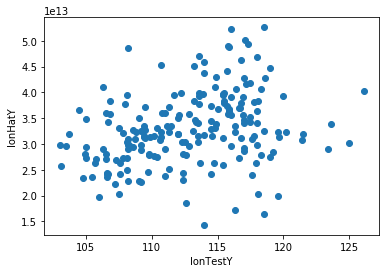

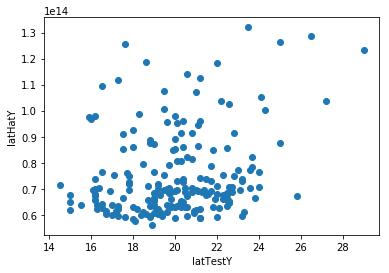

In [9]:
#调用Sklearn的SGDRegressor回归算法
from sklearn import linear_model

dataArr,lonArr,latArr=loadDataSet('data/typhoon.dat')

#随机打乱数据
# shuffle(dataArr)
# shuffle(lonArr)
# shuffle(latArr)
trainX=dataArr[0:299]
lonTrainY=lonArr[0:299]
latTrainY=latArr[0:299]
testX=dataArr[300:]
lonTestY=lonArr[300:]
latTestY=latArr[300:]

#读取p比例的数值为训练集，剩下的为测试集数据
# trainX,lonTrainY,latTrainY,testX,lonTestY,latTestY=DataSort('data/typhoon.dat',0.6)

clf=linear_model.SGDRegressor()

clf.fit(trainX,lonTrainY)
lonHatY=clf.predict(testX)

clf.fit(trainX,latTrainY)
latHatY=clf.predict(testX)

absErrorlon=absError(lonTestY,lonHatY)
absErrorlat=absError(latTestY,latHatY)

#经度误差
#纬度误差
print absErrorlon
print absErrorlat
print 110*sqrt(absErrorlon**2+absErrorlat**2)

#画出真实值与预测值的相关分布
plot_coe(lonTestY,lonHatY,latTestY,latHatY)